Note: This is just Lab 8 in the homework file. Labs 7 and 8 are separated because Lab 7 takes a long time to run and this made it easier to view and use.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import pandas as pd

In [2]:
higgs_file = open ("higgs_100000_pt_250_500.pkl", 'rb')
qcd_file = open ("qcd_100000_pt_250_500.pkl", 'rb')

# QCD is background, Higgs is signal
qcd = pickle.load(qcd_file)
higgs = pickle.load(higgs_file)
high_lumi = pd.read_hdf('data_highLumi_pt_250_500.h5')
low_lumi = pd.read_hdf('data_lowLumi_pt_250_500.h5')

print("pt = Transverse Momentum")
print("eta = Pseudo Rapidity")
print("phi = Azimuthal Angle")
print("mass = Mass")
print("ee2 = Energy Correlation Function 2")
print("ee3 = Energy Correlation Function 3")
print("d2 = Energy Correlation Function")
print("angularity = Jet broadness to thrust ratio")
print("t1 = subjettiness of degree 1")
print("t2 = subjettiness of degree 2") 
print("t3 = subjettiness of degree 3")
print("t21 = ratio of t2/t1")
print("t32 = ratio of t3/t2")
print("KtDeltaR = Delta R of two subjets within large-R jet")

pt = Transverse Momentum
eta = Pseudo Rapidity
phi = Azimuthal Angle
mass = Mass
ee2 = Energy Correlation Function 2
ee3 = Energy Correlation Function 3
d2 = Energy Correlation Function
angularity = Jet broadness to thrust ratio
t1 = subjettiness of degree 1
t2 = subjettiness of degree 2
t3 = subjettiness of degree 3
t21 = ratio of t2/t1
t32 = ratio of t3/t2
KtDeltaR = Delta R of two subjets within large-R jet


Above is a translation of the name of the data inside the dataset to what it represents. From this point on these may be used interchangeably in descriptions and labels. Anytime "QCD" is used (as in the name of the dataset), it refers to the simulation data. Anytime "Higgs" is used it refers to the pseudo-experiment data.

We are given two pseudo-experiment datasets here. The goal is to see if either of them give significance greater than 5 sigma using the feature cuts isolated in Lab 7. Both data sets call for renormalization of the simulated data to fit the number of events in the experimental data. The same general process was used for both, outlined below.

# High Luminosity
--------------------
The first part to this is isolating the part of the pseudo-experiments that are within our feature cuts. This is done below, with stacked QCD and Higgs vs. experiment data histograms shown along the way. In an ideal situation, the stacked histogram of the QCD and Higgs simulated data will line up with the experimental data- this is indicative of high overlap between the two, meaning that the experiment data follows the simulated data well. The more they line up, the better they fit together.

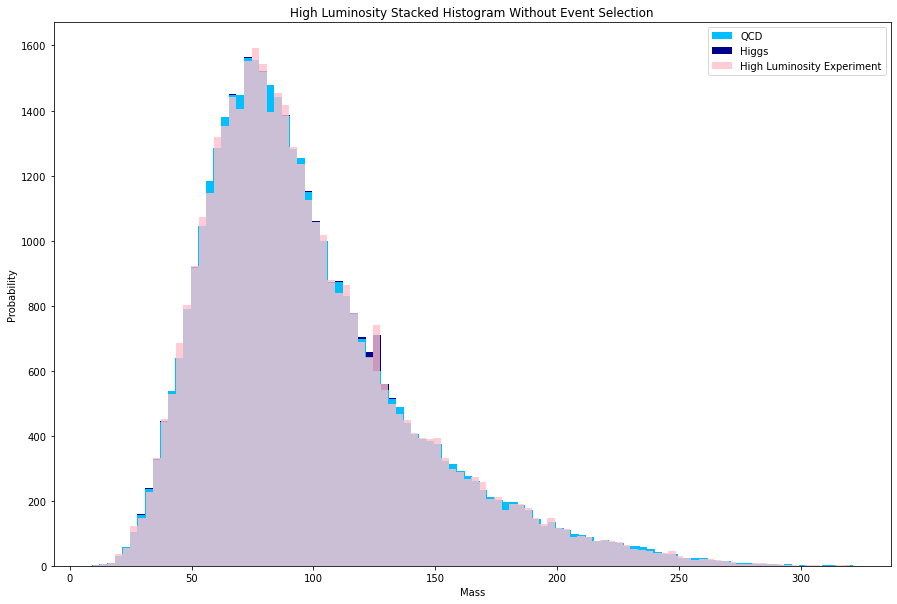

In [3]:
n_higgs = (100 / (100 + 20000)) * (len(high_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(high_lumi['mass']) / len(qcd['mass']))

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

ax.hist([qcd['mass'], higgs['mass']], bins = 100, density = False, stacked = True, weights = [qcd_weight, higgs_weight], color = ['deepskyblue', 'darkblue'])
ax.hist(high_lumi['mass'], bins = 100, density = False, alpha = .8, color = "pink")

ax.legend(["QCD", "Higgs", "High Luminosity Experiment"])
ax.set_title("High Luminosity Stacked Histogram Without Event Selection")
ax.set_xlabel("Mass")
ax.set_ylabel("Probability")

plt.show()

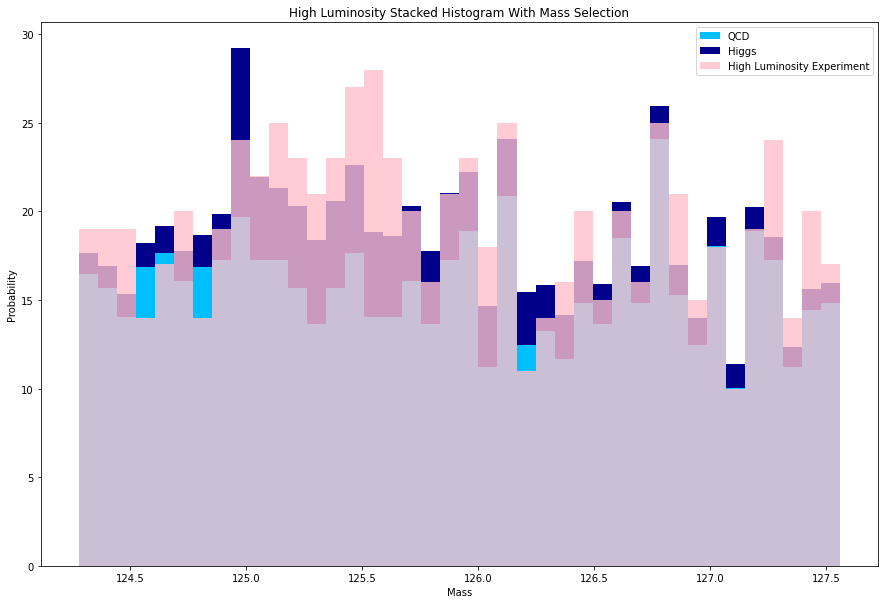

Significance with just the mass cut- 5.622068511254353


In [4]:
n_higgs = (100 / (100 + 20000)) * (len(high_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(high_lumi['mass']) / len(qcd['mass']))

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

q = ax.hist([qcd['mass'], higgs['mass']], bins = 40, density = False, stacked = True, weights = [qcd_weight, higgs_weight], range = [124.28, 127.56], color = ['deepskyblue', 'darkblue'])
l = ax.hist(high_lumi['mass'], bins = 40, density = False, alpha = .8, color = "pink", range = [124.28, 127.56])

ax.legend(["QCD", "Higgs", "High Luminosity Experiment"])
ax.set_title("High Luminosity Stacked Histogram With Mass Selection")
ax.set_xlabel("Mass")
ax.set_ylabel("Probability")

plt.show()

n_exp = np.sum(q[0][0])
n_sim = np.sum(l[0])
sig = stats.norm.ppf(stats.poisson.cdf(n_sim, n_exp, loc = 0))
print('Significance with just the mass cut- ' + str(sig))

Significance for d2- -10.002556788133456
Significance for t2- -7.713252026749659
Significance for t3- -8.282726049645348


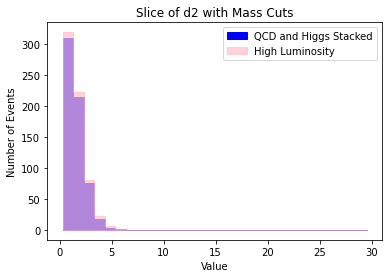

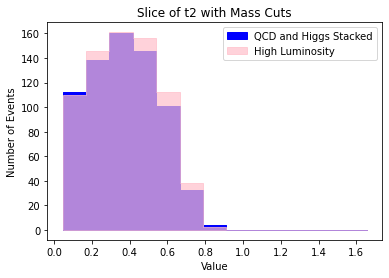

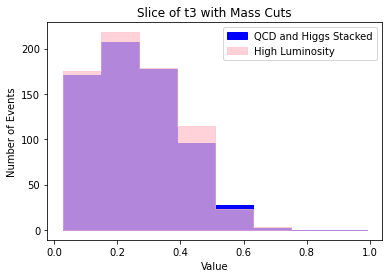

In [5]:
fig, ax = plt.subplots(3, 1, figsize = (8,15))
plt.close()
fig2, ax2 = plt.subplots(1, 1)

n_higgs = (100 / (100 + 20000)) * (len(high_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(high_lumi['mass']) / len(qcd['mass']))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

mass_lower = qcd['mass'].min()
mass_upper = qcd['mass'].max()

lower_val = qcd['d2'].min()
upper_val = qcd['d2'].max()

bin_num = 100

hist_qcd = ax[0].hist2d(qcd['mass'], qcd['d2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = qcd_weight)
hist_higgs = ax[1].hist2d(higgs['mass'], higgs['d2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = higgs_weight)
hist_lumi = ax[2].hist2d(high_lumi['mass'], high_lumi['d2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False)

qcd_slice = hist_qcd[0][35]
higgs_slice = hist_higgs[0][35]
lumi_slice = hist_lumi[0][35]

plt.fill_between(hist_qcd[2][0:30], qcd_slice[0:30] + higgs_slice[0:30], color = 'blue', alpha = 1, step = 'pre')
plt.fill_between(hist_lumi[2][0:30], lumi_slice[0:30], color = 'pink', alpha = .7, step = 'pre')

# ax2.step(hist_qcd[2][0:30], qcd_slice[0:30] + higgs_slice[0:30], alpha = 1, color = 'blue')
# ax2.step(hist_lumi[2][0:30], lumi_slice[0:30], color = 'pink', alpha = .9)
ax2.set_title("Slice of d2 with Mass Cuts")
ax2.legend(["QCD and Higgs Stacked", 'High Luminosity'])
ax2.set_xlabel("Value")
ax2.set_ylabel("Number of Events")

n_exp = lumi_slice[0]
n_sim = qcd_slice[0]
sig = stats.norm.ppf(stats.poisson.cdf(n_sim, n_exp, loc = 0))
print("Significance for d2- " + str(sig))


# ----------- t2 ---------------

fig, ax = plt.subplots(3, 1, figsize = (8,15))
plt.close()
fig2, ax2 = plt.subplots(1, 1)

n_higgs = (100 / (100 + 20000)) * (len(high_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(high_lumi['mass']) / len(qcd['mass']))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

mass_lower = qcd['mass'].min()
mass_upper = qcd['mass'].max()

lower_val = qcd['t2'].min()
upper_val = qcd['t2'].max()

bin_num = 14

hist_qcd = ax[0].hist2d(qcd['mass'], qcd['t2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = qcd_weight)
hist_higgs = ax[1].hist2d(higgs['mass'], higgs['t2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = higgs_weight)
hist_lumi = ax[2].hist2d(high_lumi['mass'], high_lumi['t2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False)

qcd_slice = hist_qcd[0][35]
higgs_slice = hist_higgs[0][35]
lumi_slice = hist_lumi[0][35]

plt.fill_between(hist_qcd[2][0:bin_num], qcd_slice[0:bin_num] + higgs_slice[0:bin_num], color = 'blue', alpha = 1, step = 'pre')
plt.fill_between(hist_lumi[2][0:bin_num], lumi_slice[0:bin_num], color = 'pink', alpha = .7, step = 'pre')

# ax2.step(hist_qcd[2][0:bin_num], qcd_slice[0:bin_num] + higgs_slice[0:bin_num], alpha = 1, color = 'blue')
# ax2.step(hist_lumi[2][0:bin_num], lumi_slice[0:bin_num], color = 'pink', alpha = .9)
ax2.set_title("Slice of t2 with Mass Cuts")
ax2.legend(["QCD and Higgs Stacked", 'High Luminosity'])
ax2.set_xlabel("Value")
ax2.set_ylabel("Number of Events")

n_exp = lumi_slice[0]
n_sim = qcd_slice[0]
sig = stats.norm.ppf(stats.poisson.cdf(n_sim, n_exp, loc = 0))
print("Significance for t2- " + str(sig))

# -------------------- t3 -------------------

fig, ax = plt.subplots(3, 1, figsize = (8,15))
plt.close()
fig2, ax2 = plt.subplots(1, 1)

n_higgs = (100 / (100 + 20000)) * (len(high_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(high_lumi['mass']) / len(qcd['mass']))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

mass_lower = qcd['mass'].min()
mass_upper = qcd['mass'].max()

lower_val = qcd['t3'].min()
upper_val = qcd['t3'].max()

bin_num = 9

hist_qcd = ax[0].hist2d(qcd['mass'], qcd['t3'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = qcd_weight)
hist_higgs = ax[1].hist2d(higgs['mass'], higgs['t3'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = higgs_weight)
hist_lumi = ax[2].hist2d(high_lumi['mass'], high_lumi['t3'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False)

qcd_slice = hist_qcd[0][35]
higgs_slice = hist_higgs[0][35]
lumi_slice = hist_lumi[0][35]

plt.fill_between(hist_qcd[2][0:bin_num], qcd_slice[0:bin_num] + higgs_slice[0:bin_num], color = 'blue', alpha = 1, step = 'pre')
plt.fill_between(hist_lumi[2][0:bin_num], lumi_slice[0:bin_num], color = 'pink', alpha = .7, step = 'pre')

# ax2.step(hist_qcd[2][0:bin_num], qcd_slice[0:bin_num] + higgs_slice[0:bin_num], alpha = 1, color = 'blue')
# ax2.step(hist_lumi[2][0:bin_num], lumi_slice[0:bin_num], color = 'pink', alpha = .9)
ax2.set_title("Slice of t3 with Mass Cuts")
ax2.legend(["QCD and Higgs Stacked", 'High Luminosity'])
ax2.set_xlabel("Value")
ax2.set_ylabel("Number of Events")

n_exp = lumi_slice[0]
n_sim = qcd_slice[0]
sig = stats.norm.ppf(stats.poisson.cdf(n_sim, n_exp, loc = 0))
print("Significance for t3- " + str(sig))

Above also shows the significances (10 for d2, 7.7 for t2, 8.3 for t3). These signficances were calculated using Poisson statistics as before, except now we use the experimental data event number for the mean and the simulated data event number for the x-value of the cdf. All of the feature cuts gave greater than 5 sigma significance, indicating likely Higgs detection. Interestingly, they were all well above the expected significances as well. This means the pseudo-experiment data had more occurences in the looked at ranges than the expectation. 

# Low Luminosity 
-------------------
For the low luminosity pseudo-experimental data, the same process was followed. Once again, stacked histograms shown along the way.

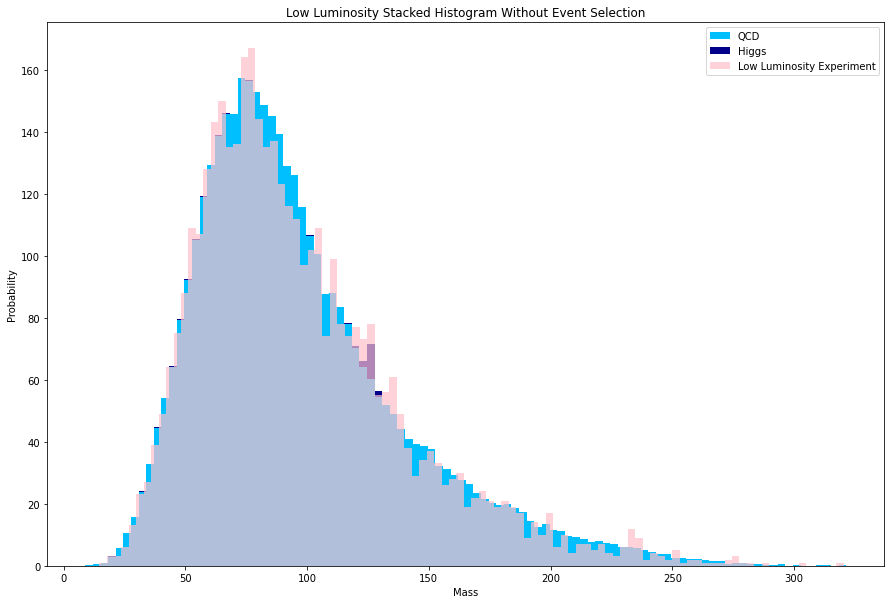

In [6]:
n_higgs = (100 / (100 + 20000)) * (len(low_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(low_lumi['mass']) / len(qcd['mass']))

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

ax.hist([qcd['mass'], higgs['mass']], bins = 100, density = False, stacked = True, weights = [qcd_weight, higgs_weight], color = ['deepskyblue', 'darkblue'])
ax.hist(low_lumi['mass'], bins = 100, density = False, alpha = .7, color = 'pink')

ax.legend(["QCD", "Higgs", "Low Luminosity Experiment"])
ax.set_title("Low Luminosity Stacked Histogram Without Event Selection")
ax.set_xlabel("Mass")
ax.set_ylabel("Probability")

plt.show()

In [ ]:
n_higgs = (100 / (100 + 20000)) * (len(low_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(low_lumi['mass']) / len(qcd['mass']))

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

q = ax.hist([qcd['mass'], higgs['mass']], bins = 30, density = False, stacked = True, weights = [qcd_weight, higgs_weight], range = [124.28, 127.56], color = ['deepskyblue', 'darkblue'])
l = ax.hist(low_lumi['mass'], bins = 30, density = False, alpha = .7, color = 'pink', range = [124.28, 127.56])

ax.legend(["QCD", "Higgs", "Low Luminosity Experiment"])
ax.set_title("Low Luminosity Stacked Histogram With Mass Selection")
ax.set_xlabel("Mass")
ax.set_ylabel("Number of Events")

plt.show()

n_exp = np.sum(q[0][0])
n_sim = np.sum(l[0])
sig = stats.norm.ppf(stats.poisson.cdf(n_sim, n_exp, loc = 0))
print('Significance with just the mass cut- ' + str(sig))

Significance for d2- -1.7237099162114706
Significance for t2- -2.0898499829712573
Significance for t3- -2.1118125494921345


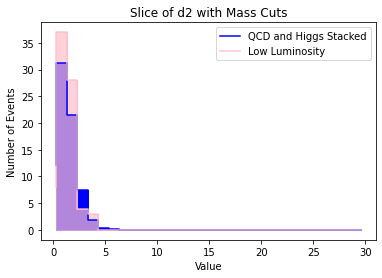

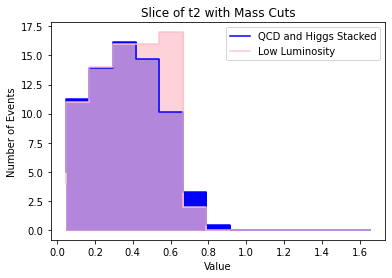

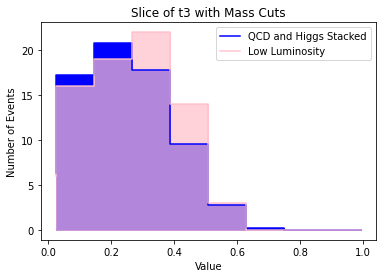

In [8]:
# ------------------- d2 -------------

fig, ax = plt.subplots(3, 1, figsize = (8,15))
plt.close()
fig2, ax2 = plt.subplots(1, 1)

n_higgs = (100 / (100 + 20000)) * (len(low_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(low_lumi['mass']) / len(qcd['mass']))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

mass_lower = qcd['mass'].min()
mass_upper = qcd['mass'].max()

lower_val = qcd['d2'].min()
upper_val = qcd['d2'].max()

bin_num = 100

hist_qcd = ax[0].hist2d(qcd['mass'], qcd['d2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = qcd_weight)
hist_higgs = ax[1].hist2d(higgs['mass'], higgs['d2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = higgs_weight)
hist_lumi = ax[2].hist2d(low_lumi['mass'], low_lumi['d2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False)

qcd_slice = hist_qcd[0][35]
higgs_slice = hist_higgs[0][35]
lumi_slice = hist_lumi[0][35]

plt.fill_between(hist_qcd[2][0:30], qcd_slice[0:30] + higgs_slice[0:30], color = 'blue', alpha = 1, step = 'pre')
plt.fill_between(hist_lumi[2][0:30], lumi_slice[0:30], color = 'pink', alpha = .7, step = 'pre')

ax2.step(hist_qcd[2][0:30], qcd_slice[0:30] + higgs_slice[0:30], alpha = 1, color = 'blue')
ax2.step(hist_lumi[2][0:30], lumi_slice[0:30], color = 'pink', alpha = .9)
ax2.set_title("Slice of d2 with Mass Cuts")
ax2.legend(["QCD and Higgs Stacked", 'Low Luminosity'])
ax2.set_xlabel("Value")
ax2.set_ylabel("Number of Events")

n_exp = lumi_slice[0]
n_sim = qcd_slice[0]
sig = stats.norm.ppf(stats.poisson.cdf(n_sim, n_exp, loc = 0))
print("Significance for d2- " + str(sig))
# ----------- t2 ---------------

fig, ax = plt.subplots(3, 1, figsize = (8,15))
plt.close()
fig2, ax2 = plt.subplots(1, 1)

n_higgs = (100 / (100 + 20000)) * (len(low_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(low_lumi['mass']) / len(qcd['mass']))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

mass_lower = qcd['mass'].min()
mass_upper = qcd['mass'].max()

lower_val = qcd['t2'].min()
upper_val = qcd['t2'].max()

bin_num = 14

hist_qcd = ax[0].hist2d(qcd['mass'], qcd['t2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = qcd_weight)
hist_higgs = ax[1].hist2d(higgs['mass'], higgs['t2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = higgs_weight)
hist_lumi = ax[2].hist2d(low_lumi['mass'], low_lumi['t2'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False)

qcd_slice = hist_qcd[0][35]
higgs_slice = hist_higgs[0][35]
lumi_slice = hist_lumi[0][35]

plt.fill_between(hist_qcd[2][0:bin_num], qcd_slice[0:bin_num] + higgs_slice[0:bin_num], color = 'blue', alpha = 1, step = 'pre')
plt.fill_between(hist_lumi[2][0:bin_num], lumi_slice[0:bin_num], color = 'pink', alpha = .7, step = 'pre')

ax2.step(hist_qcd[2][0:bin_num], qcd_slice[0:bin_num] + higgs_slice[0:bin_num], alpha = 1, color = 'blue')
ax2.step(hist_lumi[2][0:bin_num], lumi_slice[0:bin_num], color = 'pink', alpha = .9)
ax2.set_title("Slice of t2 with Mass Cuts")
ax2.legend(["QCD and Higgs Stacked", 'Low Luminosity'])
ax2.set_xlabel("Value")
ax2.set_ylabel("Number of Events")

n_exp = lumi_slice[0]
n_sim = qcd_slice[0]
sig = stats.norm.ppf(stats.poisson.cdf(n_sim, n_exp, loc = 0))
print("Significance for t2- " + str(sig))
# -------------------- t3 -------------------

fig, ax = plt.subplots(3, 1, figsize = (8,15))
plt.close()
fig2, ax2 = plt.subplots(1, 1)

n_higgs = (100 / (100 + 20000)) * (len(low_lumi['mass']) / len(higgs['mass']))
n_qcd = (20000 / (100 + 20000)) * (len(low_lumi['mass']) / len(qcd['mass']))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

mass_lower = qcd['mass'].min()
mass_upper = qcd['mass'].max()

lower_val = qcd['t3'].min()
upper_val = qcd['t3'].max()

bin_num = 9

hist_qcd = ax[0].hist2d(qcd['mass'], qcd['t3'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = qcd_weight)
hist_higgs = ax[1].hist2d(higgs['mass'], higgs['t3'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False, weights = higgs_weight)
hist_lumi = ax[2].hist2d(low_lumi['mass'], low_lumi['t3'], bins = [95, bin_num], range = [[mass_lower, mass_upper], [lower_val, upper_val]], density = False)

qcd_slice = hist_qcd[0][35]
higgs_slice = hist_higgs[0][35]
lumi_slice = hist_lumi[0][35]

plt.fill_between(hist_qcd[2][0:bin_num], qcd_slice[0:bin_num] + higgs_slice[0:bin_num], color = 'blue', alpha = 1, step = 'pre')
plt.fill_between(hist_lumi[2][0:bin_num], lumi_slice[0:bin_num], color = 'pink', alpha = .7, step = 'pre')

ax2.step(hist_qcd[2][0:bin_num], qcd_slice[0:bin_num] + higgs_slice[0:bin_num], alpha = 1, color = 'blue')
ax2.step(hist_lumi[2][0:bin_num], lumi_slice[0:bin_num], color = 'pink', alpha = .9)
ax2.set_title("Slice of t3 with Mass Cuts")
ax2.legend(["QCD and Higgs Stacked", 'Low Luminosity'])
ax2.set_xlabel("Value")
ax2.set_ylabel("Number of Events")

n_exp = lumi_slice[0]
n_sim = qcd_slice[0]
sig = stats.norm.ppf(stats.poisson.cdf(n_sim, n_exp, loc = 0))
print("Significance for t3- " + str(sig))

From the significances shown above (1.7 for d2, 2.1 for t2, 2.1 for t3) we see that none of the cuts made a 5 sigma significance in the low luminosity dataset. This means that Higgs detection in the low luminosity range is unlikely. From this, we can calculate the upper level limit. The mass interval with highest significance was about 124-127. Taking 125.5 as the average, a 5 sigma detection from 125.5 would be about 130.5, so 130.5 is the upper limit mass for this data.

In [9]:
prob = stats.norm.cdf(5, loc = 0, scale = 1)
stats.norm.ppf(prob, loc = 125.5, scale = 1)

130.49999999997019

Overall, it seems likely that there is a Higgs detection in the high luminosity dataset, while in the low luminosity one it is possible, but not particularly likely.